![Cartoon of telecom customers](IMG_8811.png)


The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. As the data scientist on this project, you aim to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


In [254]:
# Import libraries and methods/functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Start your code here!

In [255]:
df_td = pd.DataFrame(pd.read_csv("telecom_demographics.csv"))
df_tu = pd.DataFrame(pd.read_csv("telecom_usage.csv"))

In [256]:
df_td.head(10)


,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157
5,226400,BSNL,M,69,West Bengal,Delhi,737995,2023-02-07,4,90874
6,231590,Reliance Jio,M,34,Punjab,Chennai,142400,2023-03-05,3,126886
7,194307,BSNL,F,55,Arunachal Pradesh,Chennai,762756,2022-08-30,2,38923
8,48459,Airtel,F,50,Maharashtra,Hyderabad,825280,2020-08-30,3,37305
9,156011,BSNL,M,38,Odisha,Kolkata,521017,2022-02-19,4,97705


In [257]:
df_tu.head(10)

,customer_id,calls_made,sms_sent,data_used,churn
0,15169,75,21,4532,1
1,149207,35,38,723,1
2,148119,70,47,4688,1
3,187288,95,32,10241,1
4,14016,66,23,5246,1
5,226400,65,18,5961,1
6,231590,16,17,5732,1
7,194307,45,-2,531,1
8,48459,-4,51,8292,1
9,156011,22,36,6726,1


In [258]:
df_td.info()
df_tu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 507.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  6500 non-null   int64
 1   calls_made   6500 non-null   int64

In [259]:
df_td["customer_id"].nunique()

6500

In [260]:
 df_tu["customer_id"].nunique()

6500

In [261]:
churn_df = pd.merge(df_td,df_tu,on = 'customer_id',how = 'inner')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
 10  calls_made          6500 non-null   int64 
 11  sms_sent            6500 non-null   int64 
 12  data_used           6500 non-null   int64 
 13  churn               6500 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 761.7+ KB


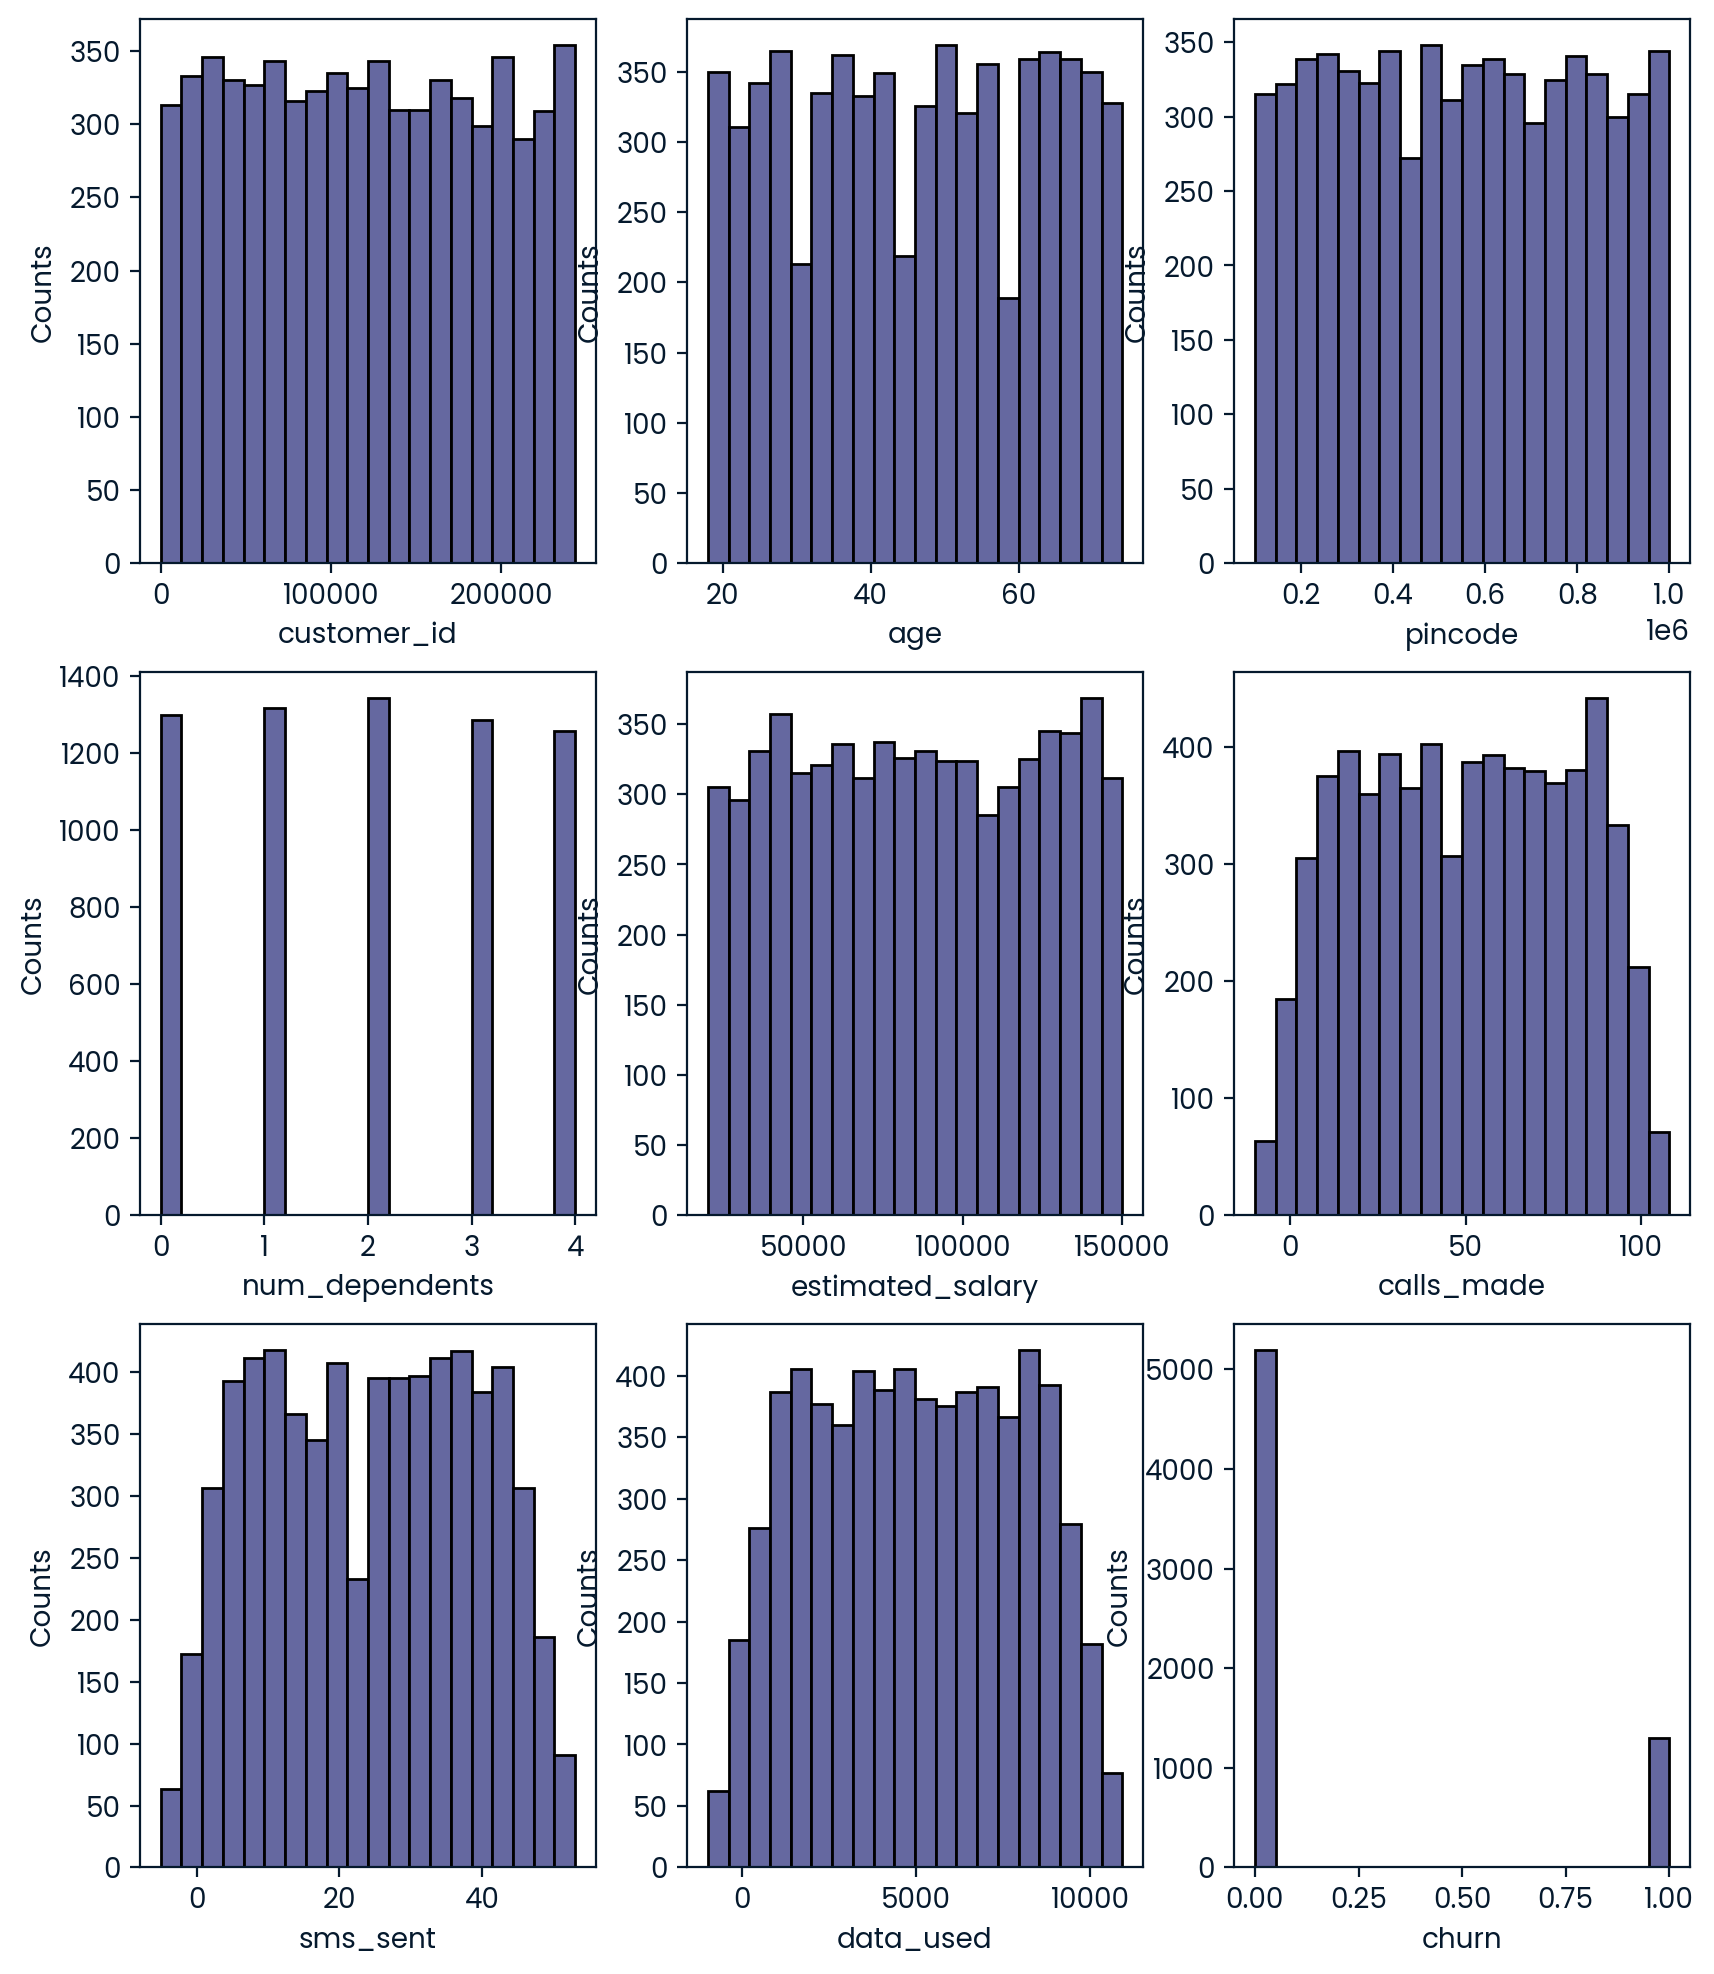

In [262]:
num_features = [el for el in churn_df.columns if el not in {'telecom_partner', 'gender', 'state', 'city', 'registration_event'}]

fig, axs = plt.subplots(3, 3, figsize=(10, 12))
axs = axs.flatten()
# Plot histograms for each column
for i, col in enumerate(num_features ):
    axs[i].hist(churn_df[col], bins=20, edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Counts')









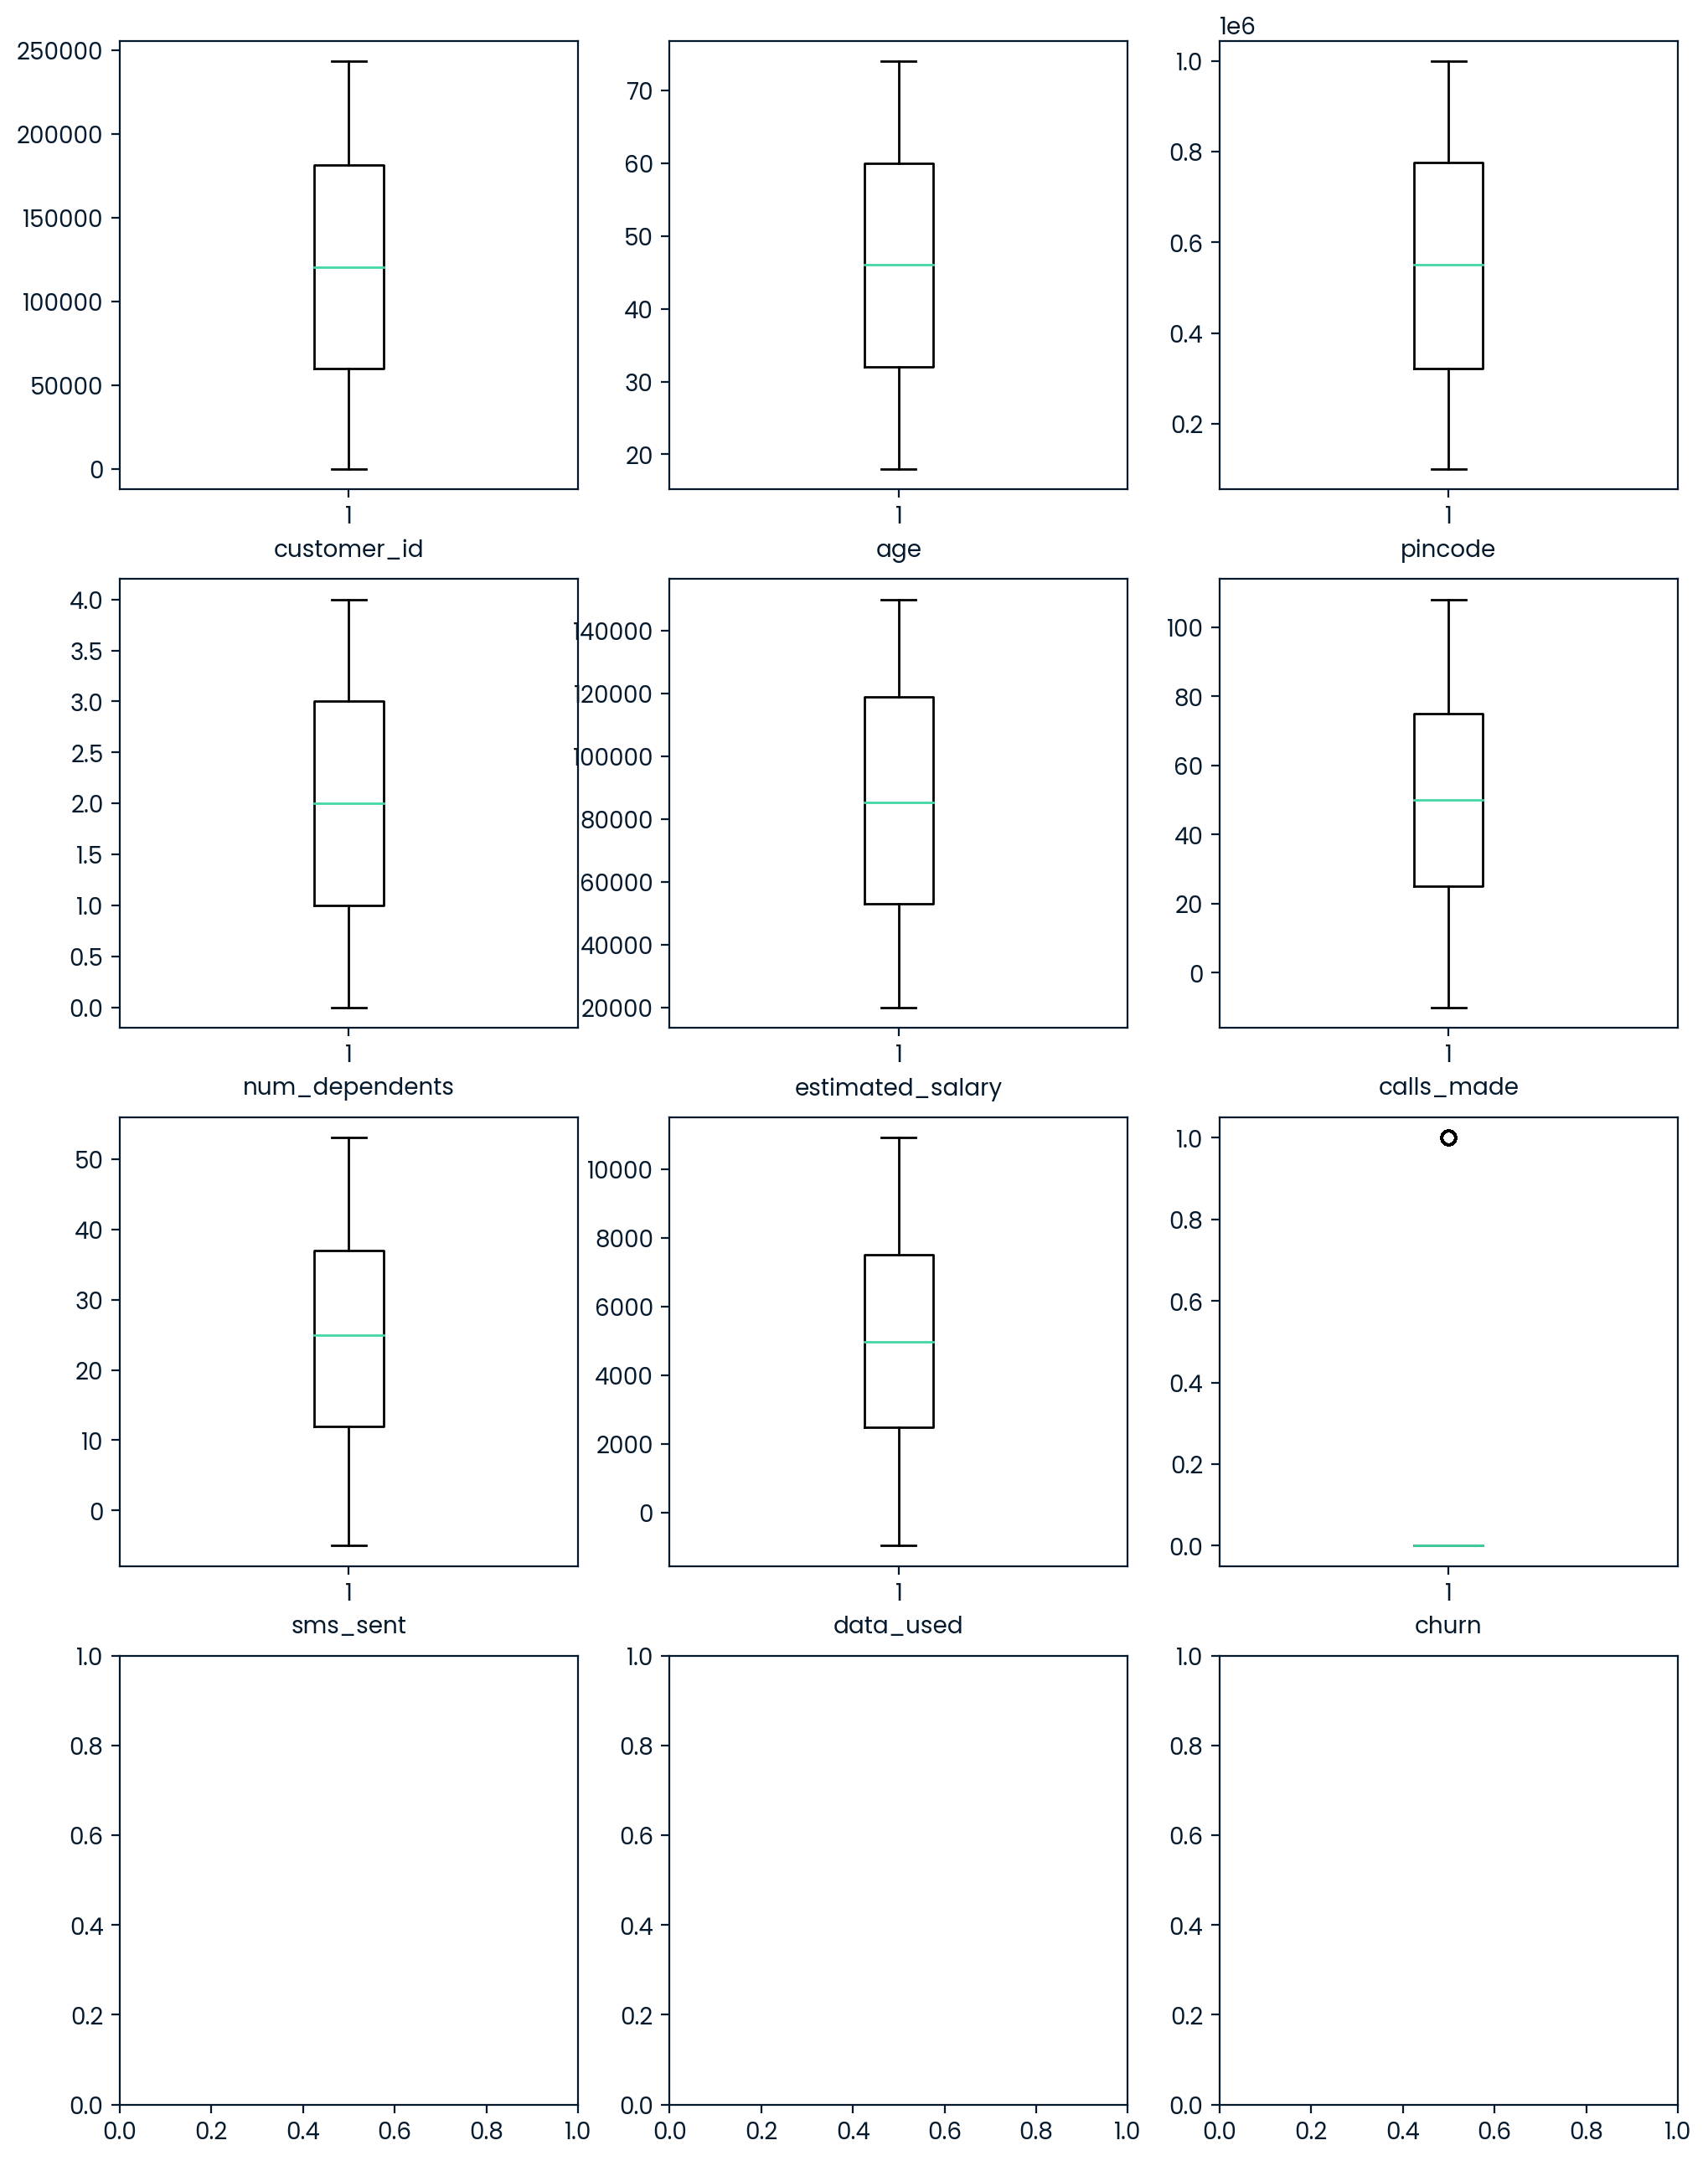

In [263]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16))
axs = axs.flatten()
# Plot boxplot for each column
for i, col in enumerate(num_features):
    # Drop None values before plotting
    data = churn_df.copy()[col].dropna()
    # Check if the data is numeric
    if np.issubdtype(data.dtype, np.number):  # Add this check
        axs[i].boxplot(data)
        axs[i].set_xlabel(col)
    else:
        print(f"Skipping non-numeric column: {col}") # Inform the user


In [264]:
churn_df.head(10)

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979,75,21,4532,1
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445,35,38,723,1
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949,70,47,4688,1
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272,95,32,10241,1
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157,66,23,5246,1
5,226400,BSNL,M,69,West Bengal,Delhi,737995,2023-02-07,4,90874,65,18,5961,1
6,231590,Reliance Jio,M,34,Punjab,Chennai,142400,2023-03-05,3,126886,16,17,5732,1
7,194307,BSNL,F,55,Arunachal Pradesh,Chennai,762756,2022-08-30,2,38923,45,-2,531,1
8,48459,Airtel,F,50,Maharashtra,Hyderabad,825280,2020-08-30,3,37305,-4,51,8292,1
9,156011,BSNL,M,38,Odisha,Kolkata,521017,2022-02-19,4,97705,22,36,6726,1


In [265]:
churn_rate = round(churn_df["churn"].agg('sum')/churn_df["churn"].count()*100,2)

In [266]:
churn_rate

20.05

In [267]:
categorical_columns = churn_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['telecom_partner', 'gender', 'state', 'city', 'registration_event']

In [268]:
# Check if the columns exist in the DataFrame before applying get_dummies
missing_columns = [col for col in categorical_columns if col not in churn_df.columns]
if missing_columns:
    print(f"The following columns are missing from the DataFrame: {missing_columns}")
else:
    # Apply get_dummies if all columns are present
    churn_df = pd.get_dummies(churn_df, columns=categorical_columns)

In [269]:
churn_df.iloc[:,:99]


,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,telecom_partner_Airtel,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,gender_F,gender_M,state_Andhra Pradesh,state_Arunachal Pradesh,state_Assam,state_Bihar,state_Chhattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jharkhand,state_Karnataka,state_Kerala,state_Madhya Pradesh,state_Maharashtra,state_Manipur,state_Meghalaya,state_Mizoram,state_Nagaland,state_Odisha,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,...,registration_event_2020-01-11,registration_event_2020-01-12,registration_event_2020-01-13,registration_event_2020-01-14,registration_event_2020-01-15,registration_event_2020-01-16,registration_event_2020-01-17,registration_event_2020-01-18,registration_event_2020-01-19,registration_event_2020-01-20,registration_event_2020-01-21,registration_event_2020-01-22,registration_event_2020-01-23,registration_event_2020-01-24,registration_event_2020-01-25,registration_event_2020-01-26,registration_event_2020-01-27,registration_event_2020-01-28,registration_event_2020-01-29,registration_event_2020-01-30,registration_event_2020-01-31,registration_event_2020-02-01,registration_event_2020-02-02,registration_event_2020-02-03,registration_event_2020-02-04,registration_event_2020-02-05,registration_event_2020-02-06,registration_event_2020-02-07,registration_event_2020-02-08,registration_event_2020-02-09,registration_event_2020-02-10,registration_event_2020-02-11,registration_event_2020-02-12,registration_event_2020-02-13,registration_event_2020-02-14,registration_event_2020-02-15,registration_event_2020-02-16,registration_event_2020-02-17,registration_event_2020-02-18,registration_event_2020-02-19
0,15169,26,667173,4,85979,75,21,4532,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,149207,74,313997,0,69445,35,38,723,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,148119,54,549925,2,75949,70,47,4688,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,187288,29,230636,3,34272,95,32,10241,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14016,45,188036,4,34157,66,23,5246,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,78836,54,125785,4,124805,-2,39,5000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6496,146521,69,923076,1,65605,20,31,3562,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6497,40413,19,152201,0,28632,73,14,65,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6498,64961,26,782127,3,119757,52,8,6835,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [270]:
# Check the columns of churn_df to see which columns are available
print(churn_df.columns)

# Assuming the columns are named differently or some columns are missing, 
# we need to adjust the list of columns accordingly. 
# For example, let's assume the correct column names are:
# 'telecom_partner', 'gender', 'state', 'city', 'registration_event'

# Update the code to use only the columns that exist in churn_df
existing_columns = [col for col in ['telecom_partner', 'gender', 'state', 'city', 'registration_event'] if col in churn_df.columns]

# Apply get_dummies only to the existing columns
churn_df = pd.get_dummies(churn_df, columns=existing_columns)

Index(['customer_id', 'age', 'pincode', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn',
       'telecom_partner_Airtel',
       ...
       'registration_event_2023-04-24', 'registration_event_2023-04-25',
       'registration_event_2023-04-26', 'registration_event_2023-04-27',
       'registration_event_2023-04-28', 'registration_event_2023-04-29',
       'registration_event_2023-04-30', 'registration_event_2023-05-01',
       'registration_event_2023-05-02', 'registration_event_2023-05-03'],
      dtype='object', length=1265)


In [271]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming some_dataframe is defined somewhere above in the notebook
# For example:
# some_dataframe = pd.read_csv('path_to_csv_file.csv')
features = churn_df.drop(['customer_id', 'churn'], axis=1)
# Define X and y
X = features

# Corrected the DataFrame name to match the one used in the error message

target = churn_df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [272]:
scaler = StandardScaler()
scaler

StandardScaler()

In [273]:


features_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

df_train_scaled= pd.DataFrame(features_scaled,columns=features.columns)
df_train_scaled.iloc[:,:99]

,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,telecom_partner_Airtel,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,gender_F,gender_M,state_Andhra Pradesh,state_Arunachal Pradesh,state_Assam,state_Bihar,state_Chhattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jharkhand,state_Karnataka,state_Kerala,state_Madhya Pradesh,state_Maharashtra,state_Manipur,state_Meghalaya,state_Mizoram,state_Nagaland,state_Odisha,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,...,registration_event_2020-01-13,registration_event_2020-01-14,registration_event_2020-01-15,registration_event_2020-01-16,registration_event_2020-01-17,registration_event_2020-01-18,registration_event_2020-01-19,registration_event_2020-01-20,registration_event_2020-01-21,registration_event_2020-01-22,registration_event_2020-01-23,registration_event_2020-01-24,registration_event_2020-01-25,registration_event_2020-01-26,registration_event_2020-01-27,registration_event_2020-01-28,registration_event_2020-01-29,registration_event_2020-01-30,registration_event_2020-01-31,registration_event_2020-02-01,registration_event_2020-02-02,registration_event_2020-02-03,registration_event_2020-02-04,registration_event_2020-02-05,registration_event_2020-02-06,registration_event_2020-02-07,registration_event_2020-02-08,registration_event_2020-02-09,registration_event_2020-02-10,registration_event_2020-02-11,registration_event_2020-02-12,registration_event_2020-02-13,registration_event_2020-02-14,registration_event_2020-02-15,registration_event_2020-02-16,registration_event_2020-02-17,registration_event_2020-02-18,registration_event_2020-02-19,registration_event_2020-02-20,registration_event_2020-02-21
0,1.153247,0.483090,1.440561,1.399261,1.138185,-0.561000,0.885150,-0.569356,-0.581495,-0.587418,1.750907,1.239591,-1.239591,-0.18328,-0.197386,-0.186064,5.358571,-0.197386,-0.192604,-0.190445,-0.195273,-0.194209,-0.20616,-0.201038,-0.175281,-0.207676,-0.198958,-0.188266,-0.196859,-0.196331,-0.198435,-0.190987,-0.192604,-0.188813,-0.19314,-0.195273,-0.196331,-0.190445,-0.178174,-0.182157,...,-0.036715,-0.031024,-0.027746,-0.027746,-0.024026,-0.024026,-0.031024,-0.013869,-0.013869,-0.033988,-0.031024,-0.031024,-0.039253,-0.027746,-0.019615,-0.024026,-0.033988,-0.019615,-0.019615,-0.033988,-0.013869,-0.024026,0.0,-0.013869,-0.019615,-0.024026,-0.033988,-0.043895,-0.024026,-0.024026,-0.031024,-0.024026,-0.019615,-0.027746,-0.019615,-0.027746,-0.019615,-0.033988,-0.033988,-0.024026
1,-0.909790,0.891787,-1.417749,-1.738329,1.606730,0.672285,-1.398986,-0.569356,1.719704,-0.587418,-0.571132,-0.806718,0.806718,-0.18328,-0.197386,-0.186064,-0.186617,-0.197386,-0.192604,-0.190445,-0.195273,-0.194209,-0.20616,-0.201038,-0.175281,-0.207676,-0.198958,-0.188266,-0.196859,-0.196331,-0.198435,-0.190987,-0.192604,5.296251,-0.19314,-0.195273,-0.196331,-0.190445,-0.178174,-0.182157,...,-0.036715,-0.031024,-0.027746,-0.027746,-0.024026,-0.024026,-0.031024,-0.013869,-0.013869,-0.033988,-0.031024,-0.031024,-0.039253,-0.027746,-0.019615,-0.024026,-0.033988,-0.019615,-0.019615,-0.033988,-0.013869,-0.024026,0.0,-0.013869,-0.019615,-0.024026,-0.033988,-0.043895,-0.024026,-0.024026,-0.031024,-0.024026,-0.019615,-0.027746,-0.019615,-0.027746,-0.019615,-0.033988,-0.033988,-0.024026
2,-0.485047,-0.885182,-0.703172,-1.515648,-0.434788,0.809317,1.717227,-0.569356,-0.581495,1.702366,-0.571132,1.239591,-1.239591,-0.18328,-0.197386,-0.186064,-0.186617,-0.197386,-0.192604,-0.190445,-0.195273,5.149100,-0.20616,-0.201038,-0.175281,-0.207676,-0.198958,-0.188266,-0.196859,-0.196331,-0.198435,-0.190987,-0.192604,-0.188813,-0.19314,-0.195273,-0.196331,-0.190445,-0.178174,-0.182157,...,-0.036715,-0.031024,-0.027746,-0.027746,-0.024026,-0.024026,-0.031024,-0.013869,-0.013869,-0.033988,-0.031024,-0.031024,-0.039253,-0.027746,-0.019615,-0.024026,-0.033988,-0.019615,-0.019615,-0.033

In [274]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

In [275]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [276]:
logreg_predtrain = logreg.predict(X_train)

In [277]:
for i in range(100):
    print(logreg_predtrain[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [278]:
logreg_predtest = logreg.predict(X_test)

In [279]:
for i in range(100):
    print(logreg_predtest[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [280]:
y_test.shape

(1300,)

In [281]:
print(confusion_matrix(y_test,logreg_predtest))

[[1027    0]
 [ 273    0]]


In [282]:
print(classification_report(y_test,logreg_predtest))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.40      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300



In [283]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
rf_model = RandomForestClassifier(random_state=42)

In [285]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [286]:
rf_pred = rf_model.predict(X_test)

In [287]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [288]:
confusion_matrix(y_test,rf_pred)

array([[1026,    1],
       [ 273,    0]])

In [289]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.39      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300



In [290]:
from sklearn.metrics import accuracy_score
accuracy_log = accuracy_score(y_test,logreg_predtest)
print(accuracy_log)

0.79


In [291]:
# higher_accuracy = "RandomForest"

Both the Machine Learning Models give same Accuracy and have no significant difference. Also, the distribution of target variable is not even in the Train dataset. 